In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv("Laptops Data.csv")

In [3]:
df= pd.DataFrame(data)

### Not enough data- Limitation

In [4]:
df.head(10)

df.shape

(1303, 12)

In [5]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Checking duplicate rows. It affects the train and test split and reduces the average. It produces baised 
### results and reduces the overall performance of the model.

In [7]:
df.duplicated().sum()

0

### To check null values

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Feature Extraction. Removing Unwanted columns, etc

In [9]:
df.drop(columns= ["Unnamed: 0"], axis= 1, inplace= True)

In [10]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Remove GB from Ram

In [11]:
df["Ram"]= df["Ram"].str.replace("GB", "")

In [12]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Remove Kg from Weight

In [13]:
df["Weight"]= df["Weight"].str.replace("kg", "")

### Convert Objects to int

In [14]:
df["Ram"]= df["Ram"].astype("int32")
df["Weight"]= df["Weight"].astype("float32")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


### Data Analysis ( EDA )

In [16]:
import seaborn as sb

## Price analysis

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\799111428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Price"])


<AxesSubplot:xlabel='Price', ylabel='Density'>

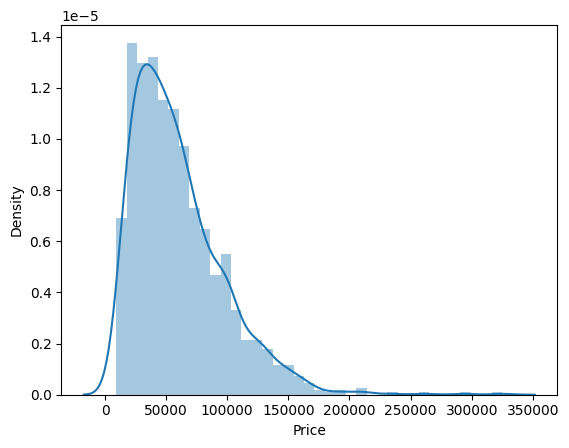

In [17]:
sb.distplot(df["Price"])

## Company of the laptop

<AxesSubplot:>

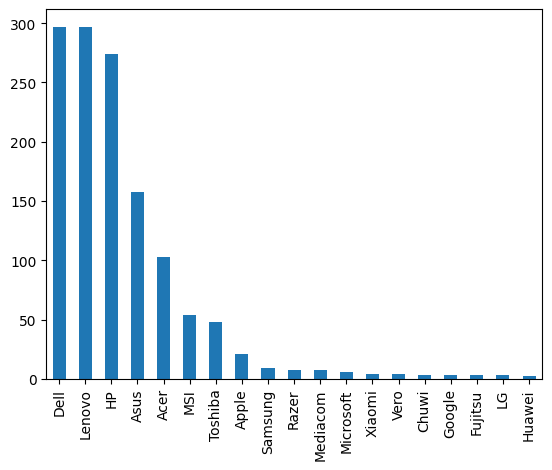

In [18]:
df["Company"].value_counts().plot(kind= "bar")

### Checking whether company name affects the price of the laptop --> Brand value

In [19]:
import matplotlib.pyplot as plt

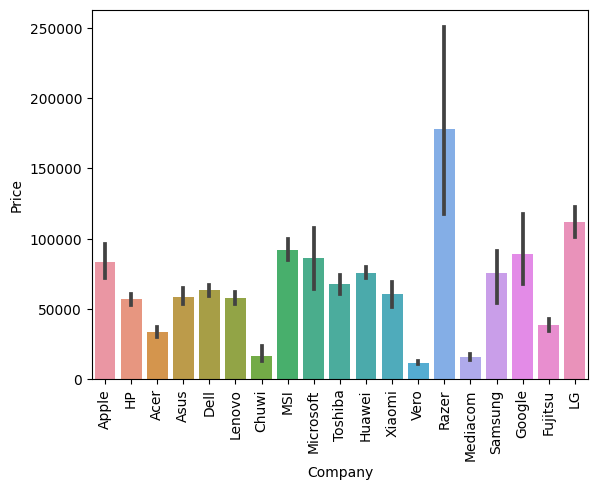

In [20]:
sb.barplot(x= df["Company"], y= df["Price"])

# To make the text on x-axis visible in the plot. 

# All the brand names are now displayed vertically than horizontally overlapped on each other.
plt.xticks(rotation= "vertical")
plt.show()

### Type Analysis

<AxesSubplot:>

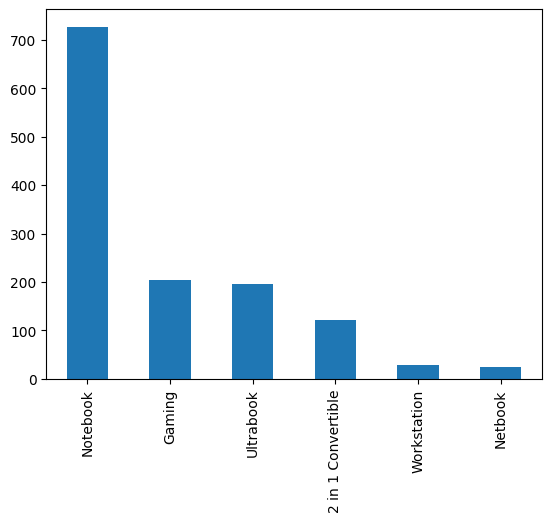

In [21]:
df["TypeName"].value_counts().plot(kind= "bar")

## Checking whether type impacts the price of the laptop

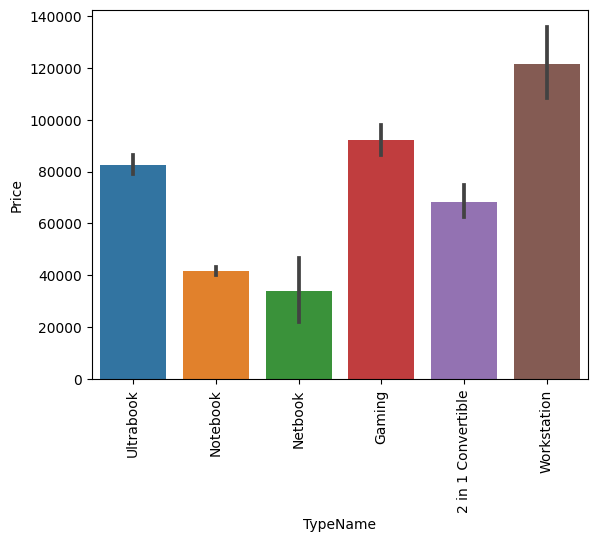

In [22]:
sb.barplot(x= df["TypeName"], y= df["Price"])

plt.xticks(rotation="vertical")
plt.show()

## Checking whether the size of laptops impact the prices

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\2066698484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Inches"])


<AxesSubplot:xlabel='Inches', ylabel='Density'>

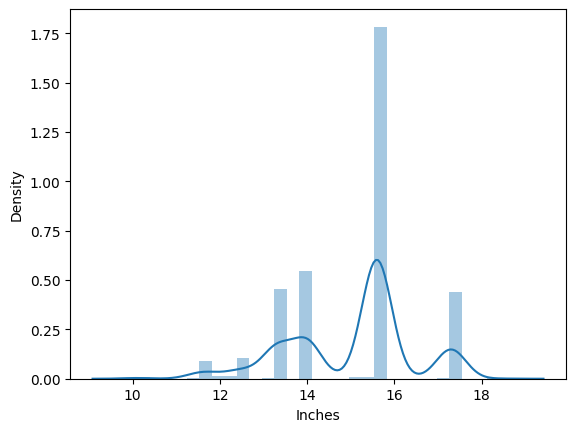

In [23]:
sb.distplot(df["Inches"])

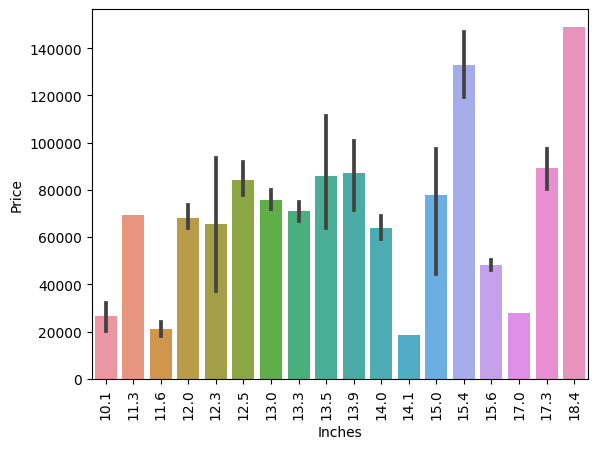

In [24]:
sb.barplot(x= df["Inches"], y= df["Price"])

plt.xticks(rotation= "vertical")
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

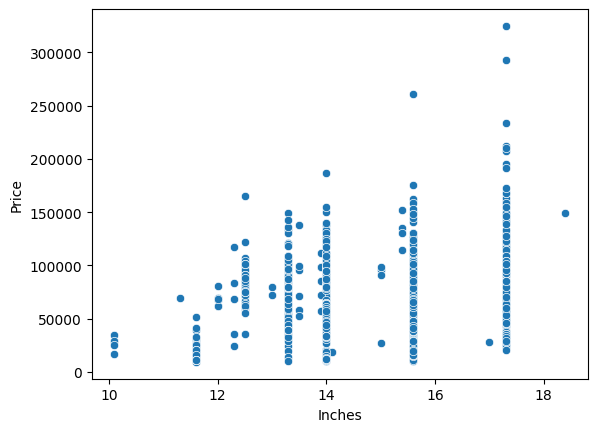

In [25]:
sb.scatterplot(x= df["Inches"], y= df["Price"])

## Screen resolution

In [26]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Creating a new column that laptop is touchscreen or not

In [27]:
df["Touchscreen"]= df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0 )

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

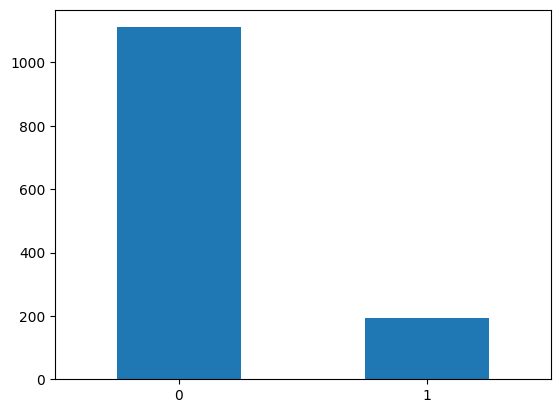

In [29]:
# No of touchscreen and non-touchscreen laptop

df["Touchscreen"].value_counts().plot(kind="bar")

plt.xticks(rotation= 0)

### Checking price variation of laptops on the basis of touch vs Non-touch screen

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

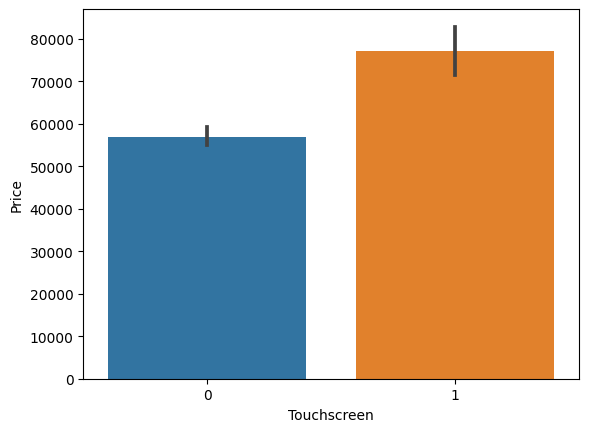

In [30]:
sb.barplot(x= df["Touchscreen"], y= df["Price"])

### IPS Panel

In [31]:
df["Ips"]= df["ScreenResolution"].apply( lambda x: 1 if "IPS" in x else 0 )

### Analysis of Ips vs Price

In [32]:
df["Ips"].value_counts()

0    938
1    365
Name: Ips, dtype: int64

[]

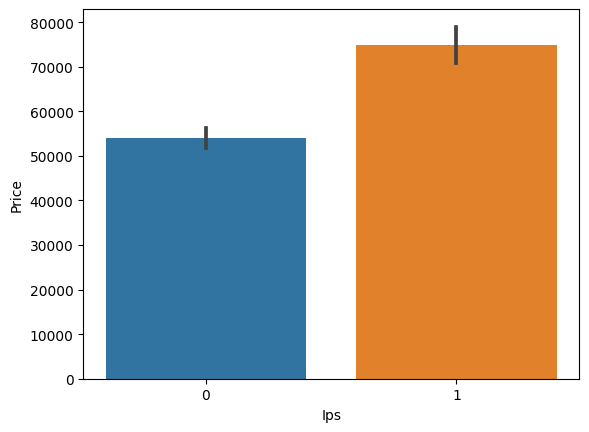

In [33]:
sb.barplot(x= df["Ips"], y= df["Price"])

plt.xticks(rotation= 0)
plt.plot()

### X and Y resolution of the laptop --> for Eg ( IPS Panel Retina Display)  2560x1600 

#### X resolution and Y resolution as 2 separate columns

In [34]:
resolutions= df["ScreenResolution"].str.split("x", n=1, expand= True)

In [35]:
resolutions

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [36]:
list= resolutions[0].str.split(" ")

list

X_Res_list= []

for i in list:
    
    length= len(i)
    
    if length == 1:
        
        X_Res_list.append(i[0])
        
    else:
        
        X_Res_list.append(i[length-1])

In [37]:
X_Res_list

['2560',
 '1440',
 '1920',
 '2880',
 '2560',
 '1366',
 '2880',
 '1440',
 '1920',
 '1920',
 '1366',
 '1920',
 '2880',
 '1920',
 '2304',
 '2560',
 '1920',
 '2880',
 '1920',
 '1920',
 '1366',
 '1920',
 '1366',
 '1920',
 '1920',
 '1366',
 '1440',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '3200',
 '1440',
 '1366',
 '1366',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '2560',
 '1366',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1366',
 '1366',
 '1920',
 '1920',
 '2256',
 '1920',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '2304',
 '1920',
 '1920',
 '1366',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '2256',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 '1920',
 

In [38]:
df["X_Res"]= X_Res_list

In [39]:
df["Y_Res"]= resolutions[1]

In [40]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_Res             1303 non-null   object 
 14  Y_Res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [42]:
# Converting both the Resolution into Integer value from object

df["X_Res"]= df["X_Res"].astype("int")
df["Y_Res"]= df["Y_Res"].astype("int")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_Res             1303 non-null   int32  
 14  Y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


### Checking Correlation

In [44]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_Res          0.556529
Y_Res          0.552809
Name: Price, dtype: float64

### We will not use X_Res and Y_Res due to their multi-collinearity with the Price.
### We will create a new column PPI- Pixel Per Inches

In [45]:
df["PPI"]= ( ( ( df["X_Res"]**2 ) + ( df["Y_Res"]**2 ) ) **0.5 )/ df["Inches"]

In [46]:
df["PPI"]= df["PPI"].astype("float")

In [47]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_Res          0.556529
Y_Res          0.552809
PPI            0.473487
Name: Price, dtype: float64

### We have extracted important values ( X_Res, Y_Res, and PPI ) from Screen Resolution column now.
### Therfore we will drop it. 

In [48]:
df.drop(columns=["ScreenResolution"], axis= 1, inplace= True)

#### There is no use of X_Res and Y_Res. We will drop them as well. 

In [49]:
df.drop(columns= ["X_Res", "Y_Res", "Inches"], inplace= True)

In [50]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670


### Like Screen Resolution column, Features should be extracted from the CPU column as well.

In [51]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

#### There are a lot of categories of processors. 
#### We will only work on 5 major categories 
#### Intel : Core i3, i5, i7, [ 3 Categories ]
#### Other intel: Celeron and Pentium [ 1 Category ]
#### AMD Version [ 1 Category ]

In [52]:
df["Cpu Name"]= df["Cpu"].apply( lambda x: " ".join(x.split(" ")[0 : 3]))

In [53]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


#### Function to find the processor out our new column Cpu name

In [54]:
def find_Processor(text):
    
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    
    else: 
        
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        
        else:
            return "AMD Processor"

In [55]:
df["CPU Brand"]= df["Cpu Name"].apply(find_Processor)

In [56]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7


<AxesSubplot:>

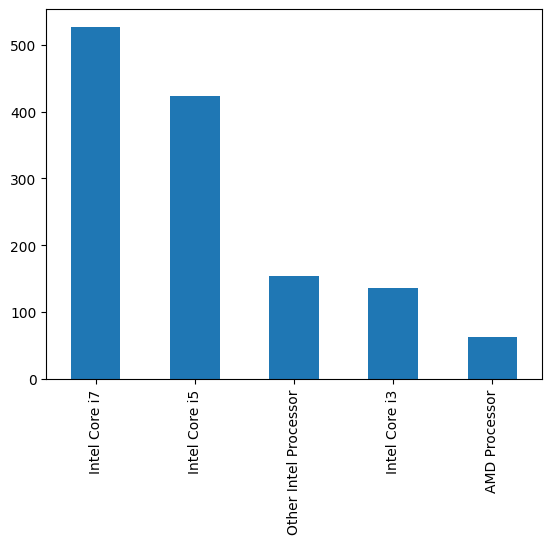

In [57]:
df["CPU Brand"].value_counts().plot(kind= "bar")

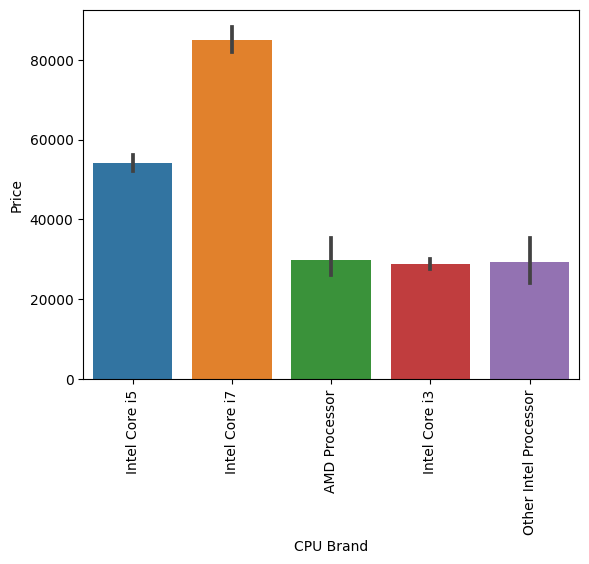

In [58]:
sb.barplot(x= df["CPU Brand"], y= df["Price"] )

plt.xticks(rotation= 90)
plt.show()

### We will drop "Cpu" and "Cpu Name" now since they are extra. We will only use the CPU Brand Column

In [59]:
df.drop( columns=["Cpu", "Cpu Name"], inplace= True)

In [60]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


### Price Analysis with Ram

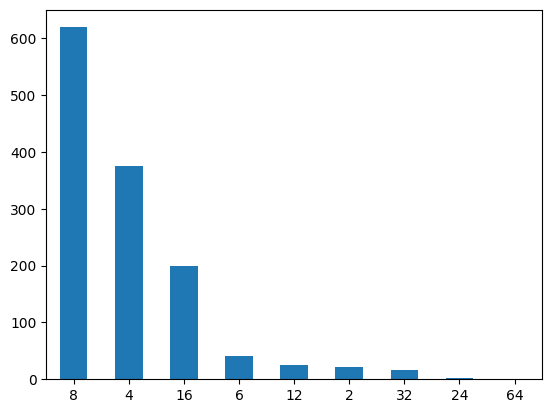

In [61]:
df["Ram"].value_counts().plot(kind= "bar")

plt.xticks(rotation= 0)
plt.show()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

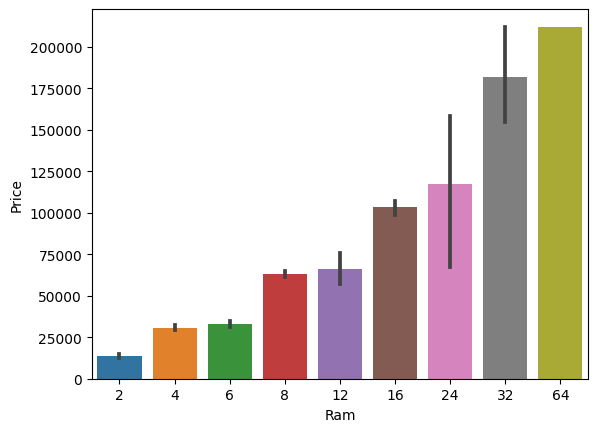

In [62]:
sb.barplot(x= df["Ram"] , y= df["Price"])

### Analysis of memory and Price

In [63]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

### There a lot of categories under memory. We will divide them into 4 major categories/ New columns
#### 1. HDD                    
#### 2. SSD
#### 3. Flash Storage   
#### 4. Hybrid

In [64]:
df["Memory"]= df["Memory"].astype(str).replace("\.0", "", regex= True)
df["Memory"]= df["Memory"].str.replace("GB", "")
df["Memory"]= df["Memory"].str.replace("TB", "000")

new= df["Memory"].str.split("+", n=1, expand= True)

In [65]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [66]:
df["First"]= new[0]

df["First"]= df["First"].str.strip()

In [67]:
df["Second"]= new[1]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   Touchscreen  1303 non-null   int64  
 9   Ips          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  CPU Brand    1303 non-null   object 
 12  First        1303 non-null   object 
 13  Second       208 non-null    object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


In [69]:
df["Layer1HDD"]= df["First"].apply( lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"]= df["First"].apply( lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"]= df["First"].apply( lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"]= df["First"].apply( lambda x: 1 if "Flash Storage" in x else 0)

In [70]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD,None,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage,None,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD,None,1,0,0,0


In [71]:
df["First"]= df["First"].str.replace(r"\D", "")

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\14123324.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["First"]= df["First"].str.replace(r"\D", "")


In [72]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,None,0,1,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,None,0,1,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64,None,0,0,0,1
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,None,1,0,0,0


In [73]:
df["Second"].fillna("0", inplace= True)

### We created column "Second" because some laptops have both SSD and HDD or 2 combinations of different categories

In [74]:
df["Layer2HDD"]= df["Second"].apply( lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"]= df["Second"].apply( lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"]= df["Second"].apply( lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"]= df["Second"].apply( lambda x: 1 if "Flash Storage" in x else 0)

In [75]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,64,0,0,0,0,1,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0


In [76]:
df["Second"]= df["Second"].str.replace(r"\D", "")

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\2069498435.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Second"]= df["Second"].str.replace(r"\D", "")


In [77]:
df["First"]= df["First"].astype("int")
df["Second"]= df["Second"].astype("int")

In [78]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,128,0,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,512,0,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,64,0,0,0,0,1,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,1000,0,1,0,0,0,0,0,0,0


In [79]:
df["HDD"]= ( ( df["First"]*df["Layer1HDD"] ) + ( df["Second"]*df["Layer2HDD"] ) )
df["SSD"]= ( ( df["First"]*df["Layer1SSD"] ) + ( df["Second"]*df["Layer2SSD"] ) )
df["Hybrid"]= ( ( df["First"]* df["Layer1Hybrid"] )  + ( df["Second"]*df["Layer2Hybrid"] ) ) 
df["Flash_Storage"]= ( ( df["First"]*df["Layer1Flash_Storage"])  + ( df["Second"]*df["Layer2Flash_Storage"] ) )

### Removing extra columns which are not required further

In [80]:
df.drop(columns=["First", "Second","Layer1HDD", "Layer2HDD", "Layer1SSD", "Layer2SSD", 
                 "Layer1Hybrid", "Layer2Hybrid", "Layer1Flash_Storage", "Layer2Flash_Storage" ], inplace= True)

In [81]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [82]:
df.drop(columns= ["Memory"], inplace= True)

In [83]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


### Checking correlation of different Storages with Price

In [84]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

#### Negative correlation with HDD and Flash Storage -- Price starts decreasing

#### We will drop Hybrid and Flash storages. The combination of HDD and SSD gives us the best results. 

In [85]:
df.drop(columns= ["Hybrid", "Flash_Storage"], inplace= True)

### Analysis of GPU

#### It has too many categories similar to  " Storage "

In [86]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

### We don't have much information about the GPU like the memory and model no of GPU chip used
### for eg Nvidia 1650 Ti. Therefore only option left here GPU brand name

In [87]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0


In [88]:
df["GPU Brand"]= df["Gpu"].apply( lambda x: x.split()[0] )

In [89]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [90]:
df["GPU Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

### There is only 1 laptop which has GPU of the brand name as "ARM".
### This data point will act as outlier. Therefore we will remove it. 

In [91]:
df[ df["GPU Brand"] == "ARM" ]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [92]:
df= df[ df["GPU Brand"] != "ARM" ]

In [93]:
df["GPU Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

### Analysis of GPU with the Price

<AxesSubplot:xlabel='GPU Brand', ylabel='Price'>

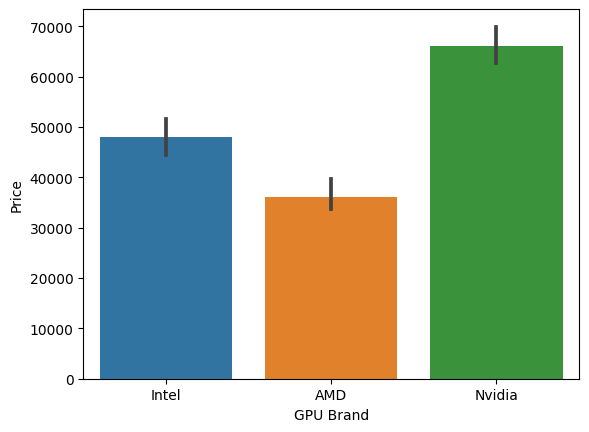

In [94]:
sb.barplot(x= df["GPU Brand"], y= df["Price"], estimator= np.median )

In [95]:
df.drop(columns= ["Gpu"], inplace= True)

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\1675077865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ["Gpu"], inplace= True)


In [96]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


### Analysis of Operating System

In [97]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

### Again there are a lot of categories. We will make only few categories 

#### 1. Windows
#### 2. Mac
#### 3. Other

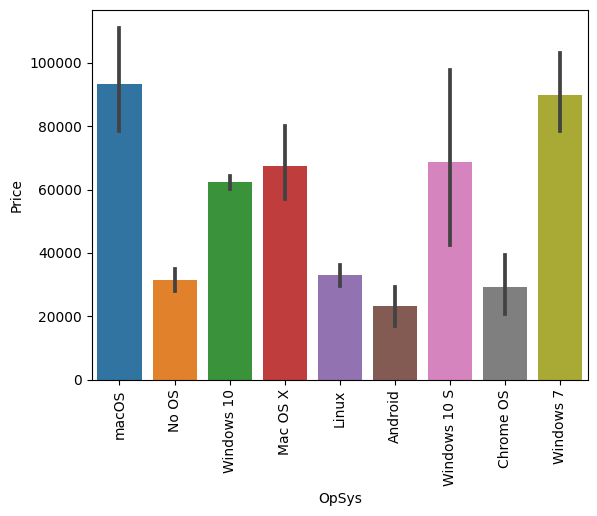

In [98]:
sb.barplot(x= df["OpSys"], y= df["Price"])

plt.xticks(rotation = 90)
plt.show()

In [99]:
def cat_os( inp ):
    
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    
    elif inp == "macOS" or inp == "macOS":
        return "Mac"
    
    else:
        return "Others/No Os/Linux"

In [100]:
df["OS"]= df["OpSys"].apply(cat_os)

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\1830234155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OS"]= df["OpSys"].apply(cat_os)


In [101]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Dropping old column ( Op_Sys ) now

In [102]:
df.drop(columns= ["OpSys"], inplace= True)

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\3916918533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= ["OpSys"], inplace= True)


In [103]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


<AxesSubplot:xlabel='OS', ylabel='Price'>

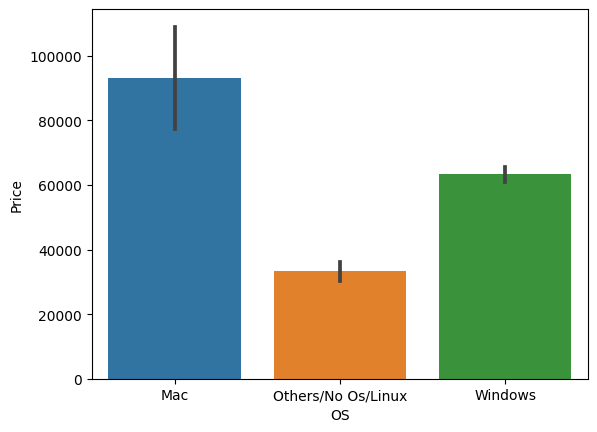

In [104]:
sb.barplot(x= df["OS"] , y= df["Price"])

### Analysis of Weight and Price

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\4203826484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Weight"])


<AxesSubplot:xlabel='Weight', ylabel='Density'>

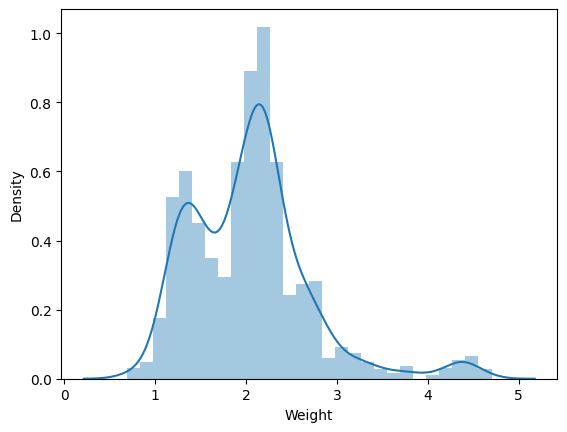

In [105]:
sb.distplot(df["Weight"])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

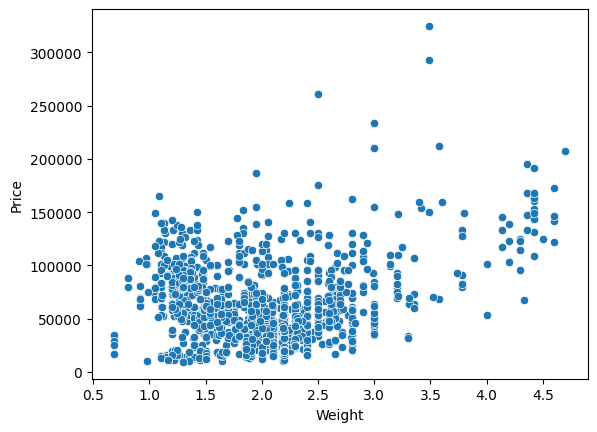

In [106]:
sb.scatterplot(x= df["Weight"] , y= df["Price"])

In [107]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

### Checking Complete correlation

In [108]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,PPI,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


### Heatmaps are more understandable
#### Lighter the color --> more correlation
#### Darker the color --> less correlation

<AxesSubplot:>

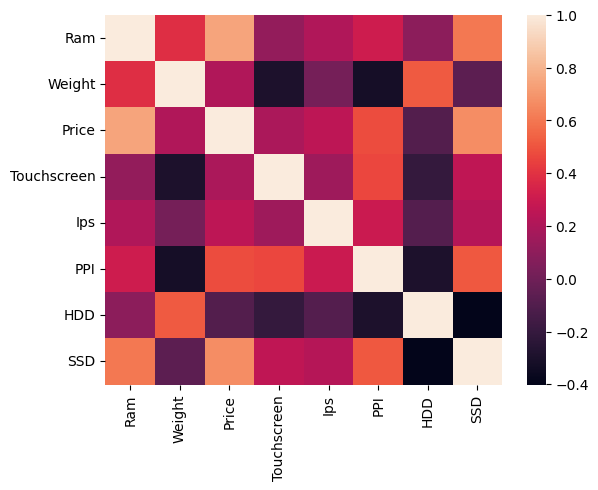

In [109]:
sb.heatmap(df.corr())

#### Better color scheme use cmap. Syntax cmap= "RdBu"   ( Red to Blue )    red = -1 blue= 1

#### Use v_min and v_max for the values in a certain range. Syntax vmin= value, vmax= value

#### Use annotation for displaying the correlation values as well. Syntax is  annot= True

<AxesSubplot:>

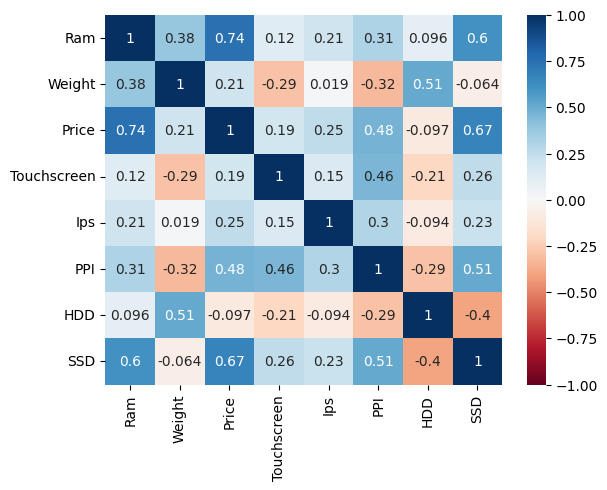

In [110]:
sb.heatmap(df.corr(), cmap="RdBu", vmin= -1, vmax= 1, annot= True)

### Analysis of target column that is " Price "

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\799111428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Price"])


<AxesSubplot:xlabel='Price', ylabel='Density'>

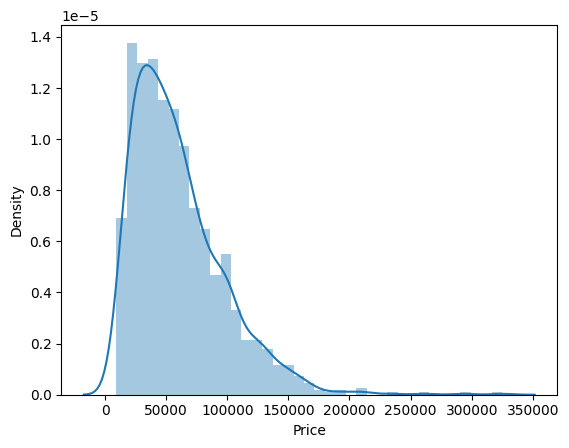

In [111]:
sb.distplot(df["Price"])

##### The target column is skewed. We can apply log transformation on it. 

C:\Users\prady\AppData\Local\Temp\ipykernel_8688\47431133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(df["Price"]))


<AxesSubplot:xlabel='Price', ylabel='Density'>

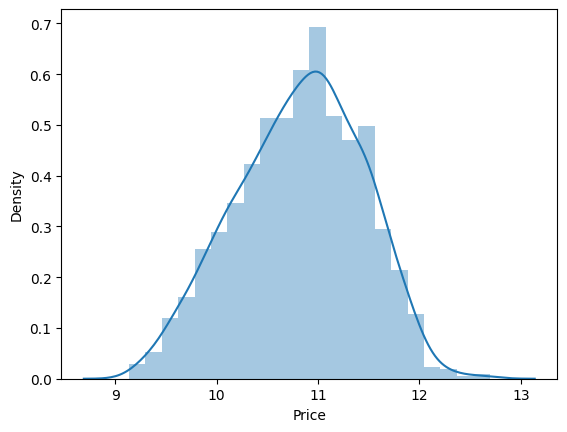

In [112]:
sb.distplot(np.log(df["Price"]))

### We will apply the same transformation for the target column in the data frame.

In [113]:
X= df.drop(columns= ["Price"])

In [114]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [115]:
Y= np.log(df["Price"])

Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### 1. Splitting the data into train and test split.
### 2. Select of M.L algorithm.
### 3. Train and Test

In [116]:
from sklearn import model_selection as ms

In [117]:
X_Train, X_Test, Y_Train, Y_Test= ms.train_test_split(X, Y, test_size= 0.15, random_state= 2)

In [118]:
X_Train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No Os/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No Os/Linux


#### We will have to handle all the categorical data. 
#### We will apply one hot encoding

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error 

### Importing all the M.L models/ Algorithms

In [120]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

### Pipelining

#### Linear Regression

In [121]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2= LinearRegression()

# Creating pipeline

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train, Y_Train)

y_pred= pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8074747226284267
Mean Absolute Error score :  0.20953298603048595


In [122]:
# Difference of only 1.221 rupees 
np.exp(.20)

1.2214027581601699

### Ridge Regression

In [123]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = Ridge(alpha=10)

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8130100480216882
Mean Absolute Error score :  0.20947753213120157


### Lasso Regression

In [124]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = Lasso(alpha=0.001)

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8070671713886916
Mean Absolute Error score :  0.21137357474501894


### KNN Regressor

In [125]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.803148868705085
Mean Absolute Error score :  0.19264883332948868


### Decision Tree Regressor

In [126]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = DecisionTreeRegressor(max_depth=8)

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8445408782841901
Mean Absolute Error score :  0.18183039827558883


### Support Vector Regressor

In [127]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8080644370053792
Mean Absolute Error score :  0.20278535549410015


### Random Forest Regressor

In [128]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15 )
                              
                            
pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8863023149967928
Mean Absolute Error score :  0.15923526318538234


### Extra Trees

In [129]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_features=0.75, max_depth=15 )
                              
                            
pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.8743522749177632
Mean Absolute Error score :  0.1622366558996981


### Adaboost Regressor

In [130]:
step1= ColumnTransformer(transformers= [ ("col_tnf", OneHotEncoder(sparse= False, drop= "first"), [0, 1, 7, 10, 11] ) ]
                        
                            ,remainder= "passthrough" ) 

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
                              
                            
pipe= Pipeline( [ ( "step1", step1 ), ( "step2", step2 ) ] )

pipe.fit(X_Train,Y_Train)

y_pred = pipe.predict(X_Test)

print("R2 score : " , r2_score(Y_Test, y_pred) )
print("Mean Absolute Error score : " , mean_absolute_error(Y_Test, y_pred ))

R2 score :  0.7902879562714293
Mean Absolute Error score :  0.22949222506157138


### Exporting the model

#### We will use Random Forest since it was giving us the best results. Run the random RandomForest Model so that we can use its pipe.

#### We will export the pipe of RandomForest Model and dataframe to create the drop down on the websites.  

In [131]:
import pickle

pickle.dump(df, open("df.pkl", "wb"))
pickle.dump(pipe, open("pipe.pkl", "wb"))

In [133]:
X_Train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No Os/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No Os/Linux
